In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler as SS
from sklearn.ensemble import RandomForestClassifier as RFC, AdaBoostClassifier as ABC
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.externals import joblib
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("C:\Users\RAJSHREE\Downloads\cardio_train.csv")

In [32]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


So from the above info we can say that data is not having any null values

In [34]:
df.drop(['id'],axis=1,inplace=True

In [35]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [37]:
df.duplicated().sum()

24

In [38]:
df.drop_duplicates(inplace=True)
print("Duplicate values count = ",df.duplicated().sum())

Duplicate values count =  0


In [36]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Columns of "age", "height", "weight", "ap_hi", "ap_lo" may have outlier.

### EDA

In [41]:
df['years'] = (df['age']/365).round().astype('int')

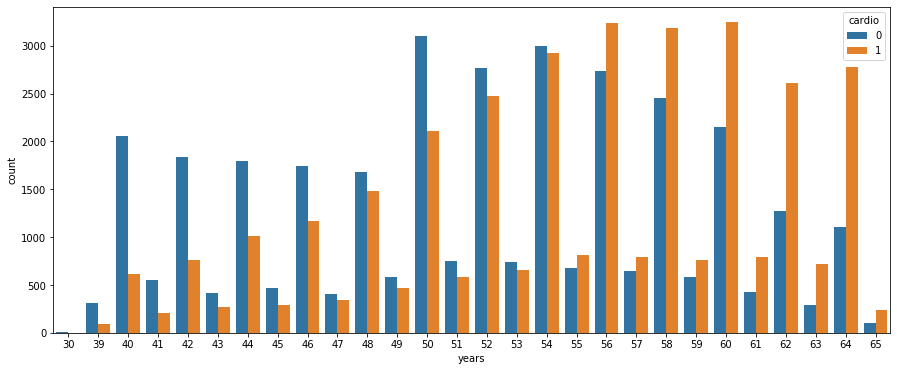

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x='years',hue='cardio',data=df)
plt.show()

From the above figure, It looks like people having age more than 50 are exposed to CVD more. 

In [43]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'years'],
      dtype='object')

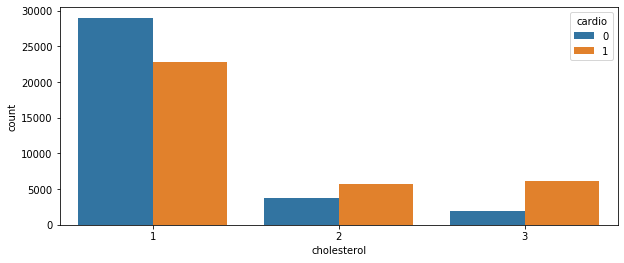

In [46]:
plt.figure(figsize=(10,4))
sns.countplot(x='cholesterol',hue='cardio',data=df)
plt.show()

People with cholesterol normal tends to have more CVD

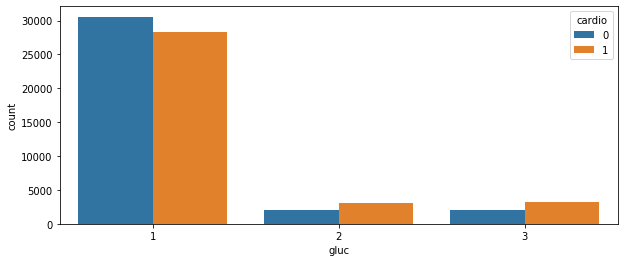

In [48]:
plt.figure(figsize=(10,4))
sns.countplot(x='gluc',hue='cardio',data=df)
plt.show()

People with normal glucose exposed to more to CVD

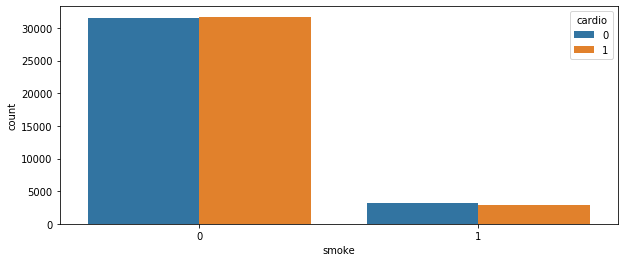

In [49]:
plt.figure(figsize=(10,4))
sns.countplot(x='smoke',hue='cardio',data=df)
plt.show()

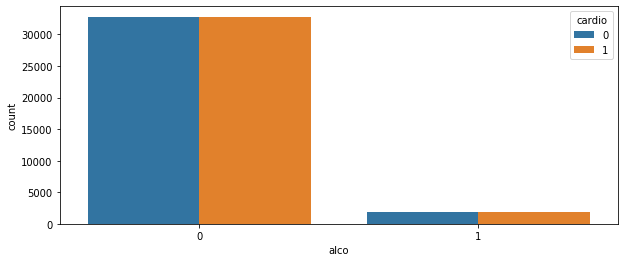

In [50]:
plt.figure(figsize=(10,4))
sns.countplot(x='alco',hue='cardio',data=df)
plt.show()

People who consumes alcohol and smokes are more exposed to CVD

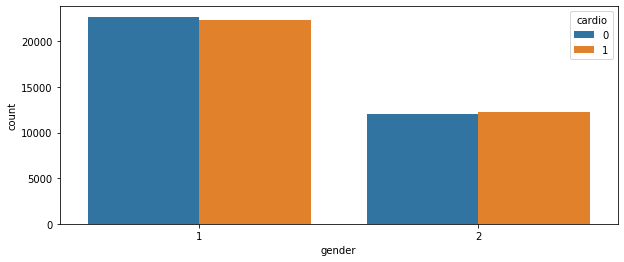

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(x='gender',hue='cardio',data=df)
plt.show()

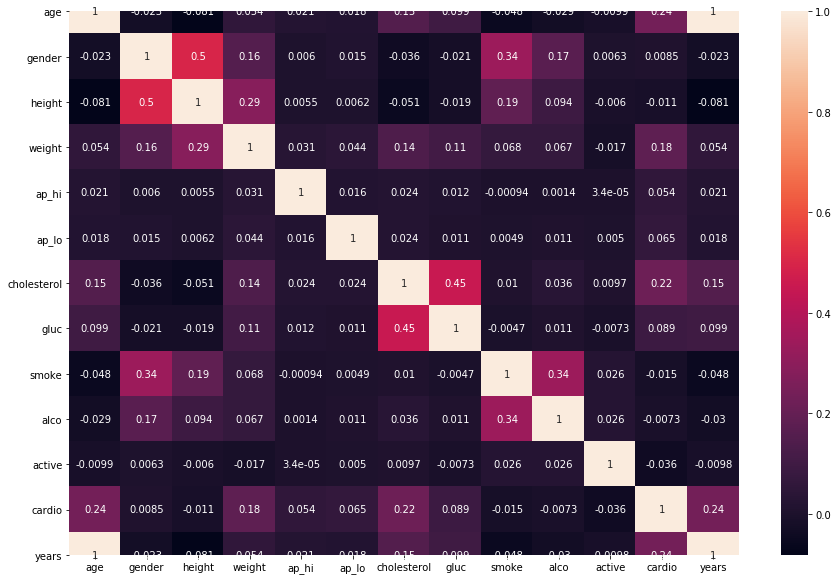

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

From above figure we can see that, CV is corelated with weight and cholesterol

In [56]:
df.drop(['years'],inplace=True,axis=1)

age               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
gender         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
height         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
weight         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
ap_hi          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
ap_lo          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
cholesterol    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
gluc                 AxesSubplot(0.125,0.125;0.0945122x0.343182)
smoke             AxesSubplot(0.238415,0.125;0.0945122x0.343182)
alco              AxesSubplot(0.351829,0.125;0.0945122x0.343182)
active            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
cardio            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
dtype: object

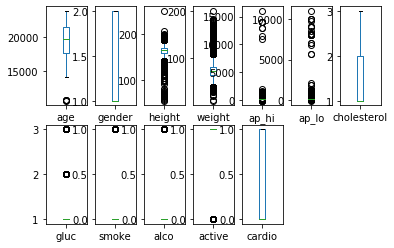

In [57]:
#Checkind for the outliers
df.plot(kind='box',subplots=True,layout=(2,7))

From the boxplot we can see there are few outliers are present in height, weight ap_hi, ap_lo

we will remove those outliers from out dataset

In [58]:
df.shape

(69277, 12)

In [60]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(df))
df = df[(z<3).all(axis=1)]

In [61]:
df.shape

(55116, 12)

We have remove outliers from our dataset with threshold value of 3

#### Lets Split the data

In [64]:
x = df.drop(["cardio"],axis=1)
y = df.cardio

In [65]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
4,23393,1,155,62.0,120,80,1,1,0,0,1
5,21143,1,164,61.0,100,70,1,1,0,0,1


In [66]:
x.skew()

age           -0.289518
gender         0.902339
height         0.098962
weight         0.573761
ap_hi         -0.252406
ap_lo          4.734132
cholesterol    2.018250
gluc           3.201971
smoke          0.000000
alco           0.000000
active        -1.498228
dtype: float64

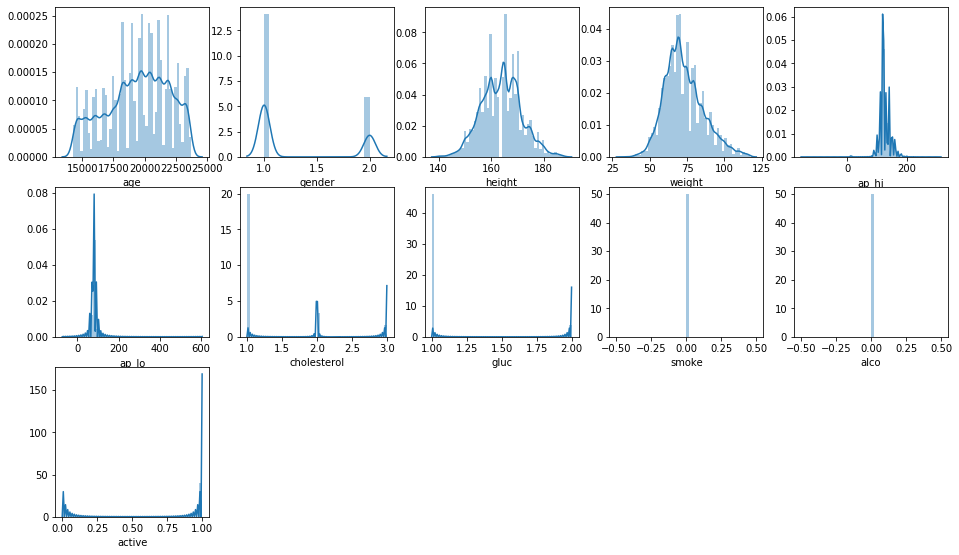

In [67]:
#Visualizing skewness
collist = x.columns.values
ncol = 5
nrows = 5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

In [69]:
ss=SS()
ss.fit(x)
x=ss.transform(x)

In [81]:
#As this data set seems to be imbalanced we will calculate auc_roc_score instead accuracy_score
def main_fun(models):
    accuracy_scores = []
    for model,name in models.items():
        print("Checking ROC score for",name)
        i = 0
        max_accu_score = 0 #max accuracy score defining
        for r_state in range(42,101):
            train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
            model.fit(train_x,train_y)
            pred_y = model.predict(test_x)
            accu_score = roc_auc_score(test_y,pred_y)
            accu_score = round(accu_score*100)
            if accu_score > max_accu_score:
                max_accu_score = accu_score
                final_r_state = r_state
        print("Max ROC Score Corresponding to random state ", final_r_state, " is ",max_accu_score)
        print()
        print("-----------------------------------------------------------------------------------------------")
        accuracy_scores.append(max_accu_score)
    return accuracy_scores

In [73]:
#Finding best parameters for KNN
neighbors = {"n_neighbors":range(1,30)}
knn = KNN()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 28}

In [76]:
#Finding best parameters for RFC
rfc = RFC() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 200}

In [83]:
#Instantiate the classifiers
clf_logreg = LoR()
clf_tree = DTC()
clf_knn =  KNN(n_neighbors=28)
clf_forest = RFC(n_estimators=200)
clf_ada = ABC()
clf_gnb = GNB()

In [84]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'RandomForest', 'Adaboost','Naive']

In [85]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_gnb: 'Naive'
         }

In [86]:
auc_roc_score = main_fun(models)

Checking ROC score for LogisticRegression
Max ROC Score Corresponding to random state  50  is  74.0

-----------------------------------------------------------------------------------------------
Checking ROC score for DecisionTree
Max ROC Score Corresponding to random state  50  is  64.0

-----------------------------------------------------------------------------------------------
Checking ROC score for KNN
Max ROC Score Corresponding to random state  44  is  73.0

-----------------------------------------------------------------------------------------------
Checking ROC score for RandomForest
Max ROC Score Corresponding to random state  50  is  72.0

-----------------------------------------------------------------------------------------------
Checking ROC score for Adaboost
Max ROC Score Corresponding to random state  50  is  74.0

-----------------------------------------------------------------------------------------------
Checking ROC score for Naive
Max ROC Score Correspon

In [107]:
#Displaying score by train test split
pd.DataFrame(auc_roc_score,columns = ['AUC ROC Scores'],index = classifiers).sort_values(by = 'AUC ROC Scores',ascending = False)

,AUC ROC Scores
LogisticRegression,74.0
Adaboost,74.0
KNN,73.0
RandomForest,72.0
Naive,71.0
DecisionTree,64.0


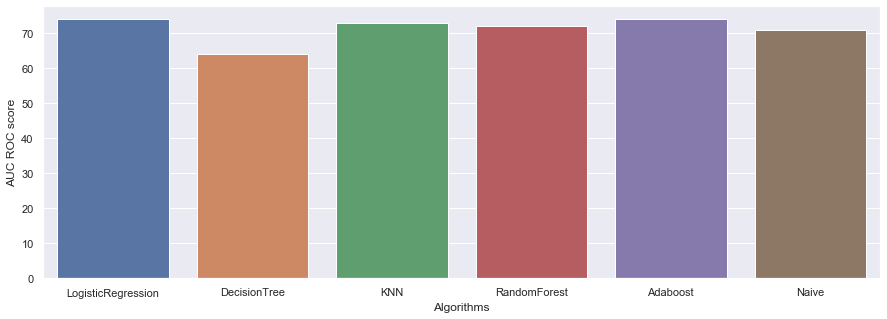

In [108]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("AUC ROC score")

sns.barplot(classifiers,auc_roc_score)

As logistic regression gave max score, so we will save logistic regression as our final model

In [116]:
#Logistic Regression gave max score for random state = 91
lor = LoR()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=91)
lor.fit(train_x,train_y)
pred_y = lor.predict(test_x)
score = roc_auc_score(test_y,pred_y)
score = round((score)*(100))
print("ROC AUC score is : ", roc_auc_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

ROC AUC score is :  <function roc_auc_score at 0x000001931EBD81F8>
Confusion matrix is

[[4554 1170]
 [1843 3457]]
Classification report 

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      5724
           1       0.75      0.65      0.70      5300

    accuracy                           0.73     11024
   macro avg       0.73      0.72      0.72     11024
weighted avg       0.73      0.73      0.73     11024



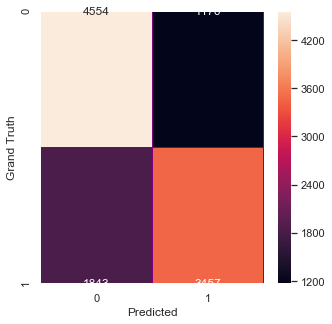

In [117]:
cm = confusion_matrix(test_y,pred_y)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

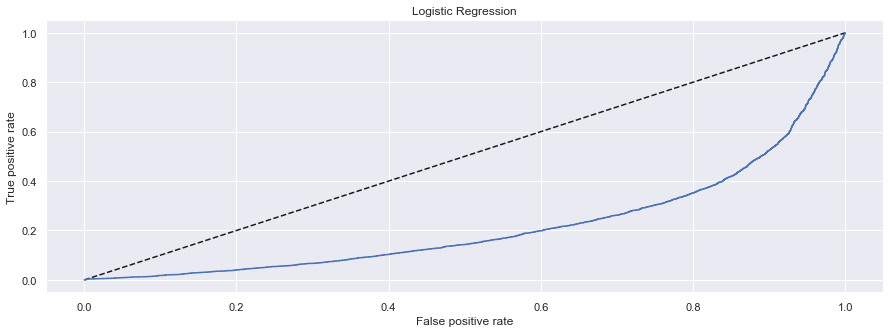

In [118]:
y_pred_prob = lor.predict_proba(test_x)[:,0]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

Our Model is predicting with the accuracy of 74%.